# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('../EDA_human_temperature/data/human_body_temperature.csv')

In [3]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

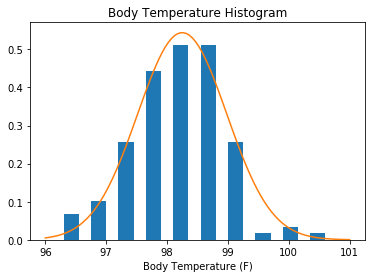

In [5]:
#Q1.Is the distribution of body temperatures normal?
#draw a hist of human body temperatures
plt.hist(df.temperature, width = 0.25, normed = True)
plt.xlabel('Body Temperature (F)')
plt.title('Body Temperature Histogram')
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)
None

In [6]:
#Normality test
norm_test = stats.mstats.normaltest(df['temperature'])
norm_test

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Q1: Is the distribution of body temperatures normal?
Answer: Yes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Q2:Is the sample size large? Are the observations independent?
Answer: The size of this sample is larger than 30, and all the observation should be independent.

Q3:
One-sample or two-sample: One-sample, since we are trying to compare one sample, which is temperatures, to the population mean.
t-test or z-test: t-test. The deviation of the population is unknown.

In [8]:
#One-sample t-test
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


Anwser: P-value < 0.05, the null hypothesis can be rejected. The ture population mean is not 98.6

In [11]:
#One-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


Anwser: The difference between is beacause the sample size, the difference will decrese while the size of sample become larger.

Q4: Try both test with smaller sample

In [12]:
#Generate small sample
small_sample = np.random.choice(df['temperature'], size=10)

In [14]:
#t-test
t_stat, p_val_t = ttest_1samp(small_sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.8679249356629297
p value = 0.018539301285027652


In [15]:
#z-test
z_stat, p_val_z = ztest(x1= small_sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -2.8679249356629297
p value = 0.004131735483329585


Q4 Anwser: The two resualt both reject the null hypothesis. I still think we should use t-test since the size of the sample is smaller than 30 and the deviation of the pupolation is unknown.

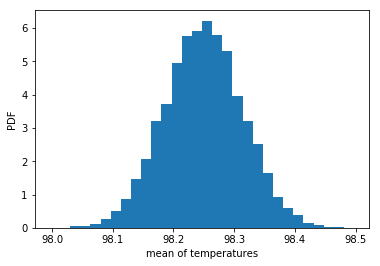

In [54]:
#Q5: Generate bootstrap sample
def bootstrap_replicate_temp(data, func):
    """Generate bootstrap replicates of human temp data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_temp(df['temperature'], np.mean)
    
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean of temperatures')
_ = plt.ylabel('PDF')
plt.show()

In [44]:
# Caculate the 95% confidence interval:
confidence_int = np.percentile(bs_replicates, [2.5, 97.5])
print(confidence_int)

[98.12459615 98.37230769]


Anwser: We can consider someone's boy temperature to be abnormal when it is outside of [98.12459615 98.37230769]

 Q6: difference between males and females in normal temperature

In [45]:
# Get male and female body temperature
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

In [47]:
len(male_temps)

65

In [48]:
len(female_temps)

65

In [49]:
# Two-sample t-test, null hypothesis is 'There is no difference between them'
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [60]:
# How's the difference
mtm = np.mean(male_temps)
mtm

98.1046153846154

In [59]:
ftm = np.mean(female_temps)
ftm

98.39384615384613

In [61]:
ms = np.std(male_temps)
ms

0.6933598841828696

In [62]:
fs = np.std(female_temps)
fs

0.7377464486428966

In [63]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [64]:
#Samples with mean and std from the given sample
samples_male = np.random.normal(mtm, ms, size=10000)
samples_female = np.random.normal(ftm, fs, size=10000)

In [65]:
x_theor_m, y_theor_m = ecdf(samples_male)
x_theor_f, y_theor_f = ecdf(samples_female)
x_m, y_m = ecdf(male_temps)
x_f, y_f = ecdf(female_temps)

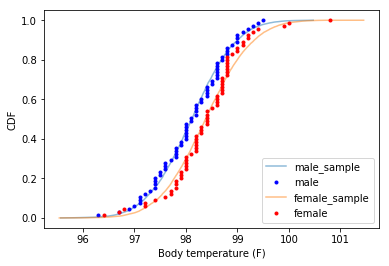

In [67]:
_ = plt.plot(x_theor_m, y_theor_m, alpha=0.5)
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_theor_f, y_theor_f, alpha=0.5)
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')

plt.legend(('male_sample','male','female_sample', 'female'), loc='lower right')
_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

Anwser: There is signficant difference between male and female body temperature. And female's normal body temperature is a little higher than male's.

Conclusion: 
1). We can consider someone's boy temperature to be abnormal when it is outside of [98.12459615 98.37230769]. 
2). Female's normal body temperature is averagly higher than male's.
3). The true mean of body temperature in this population is not 98.6F.